In [1]:
# Install and ensure we have the libraries needed.
!pip install numpy
!pip install scipy
!pip install sklearn
!pip install matplotlib
!pip install seaborn
!pip install pandas

In [2]:
# Import libraries needed.
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from sklearn.decomposition import PCA
from statsmodels.formula.api import logit
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn.metrics import roc_auc_score, classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from statsmodels.graphics.mosaicplot import mosaic 


In [3]:
#Import the raw dataset into Pandas and display it.
df=pd.read_csv('churn_raw_data.csv')
print(df)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9996       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9998       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9999       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999       10000      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   

In [4]:
#List total number of entries in dataset (RowsxColumn).
print(df.shape)

(10000, 52)


In [5]:
#Display the datatype for each column.
print(df.dtypes)

Unnamed: 0                int64
CaseOrder                 int64
Customer_id              object
Interaction              object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
Timezone                 object
Job                      object
Children                float64
Age                     float64
Education                object
Employment               object
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone   

In [6]:
#Perform checks to see if null values exists.
print(df.isna().sum())

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [7]:
#Rename the columns named item1 item2, etc.
df=df.rename({'item1' : 'Timely_Response',
                    'item2' : 'Timely_Fixes',
                    'item3' : 'Timely_Replacement',
                    'item4' : 'Reliability',
                    'item5' : 'Options',
                    'item6' : 'Respectable_Response',
                    'item7' : 'Courteous_Exchange',
                    'item8' : 'Evidence_of_active_listening'}, axis='columns')

In [8]:
#Look at the basic statistics of the dataset.
df[['Churn', 'Area','Employment','Income','Contract',
        'Timely_Fixes','Timely_Replacement','Reliability','Options',
        'Respectable_Response','Courteous_Exchange','Evidence_of_active_listening']].describe()

,Income,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening
count,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,39936.762226,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,28358.469482,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,740.660000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19285.522500,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,33186.785000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,53472.395000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,258900.700000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [9]:
#Create new datafrane and drop all unused columns for our logistic regression
dflog=df.drop(['Unnamed: 0','Age','CaseOrder','Customer_id','Interaction','City','State',
               'County','Zip','Lat','Lng','Population','Timezone','Job',
               'Children','Education','Marital', 'Outage_sec_perweek',
               'Email','Contacts','Yearly_equip_failure', 'Gender','PaperlessBilling',
               'MonthlyCharge','PaymentMethod',
               'Techie','Port_modem','Tablet', 'Tenure', 'Bandwidth_GB_Year'], axis = 1)

dflog

,Area,Employment,Income,Churn,Contract,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening
0,Urban,Part Time,28561.99,No,One year,Fiber Optic,Yes,No,Yes,Yes,...,No,Yes,5,5,5,3,4,4,3,4
1,Urban,Retired,21704.77,Yes,Month-to-month,Fiber Optic,Yes,Yes,Yes,No,...,Yes,Yes,3,4,3,3,4,3,4,4
2,Urban,Student,NaN,No,Two Year,DSL,Yes,Yes,No,No,...,No,Yes,4,4,2,4,4,3,3,3
3,Suburban,Retired,18925.23,No,Two Year,DSL,Yes,No,Yes,No,...,Yes,No,4,4,4,2,5,4,3,3
4,Suburban,Student,40074.19,Yes,Month-to-month,Fiber Optic,No,No,No,No,...,Yes,No,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Rural,Retired,55723.74,No,Month-to-month,DSL,NaN,Yes,No,Yes,...,No,No,3,2,3,3,4,3,2,3
9996,Rural,Part Time,NaN,No,Two Year,Fiber Optic,NaN,Yes,Yes,Yes,...,Yes,No,4,5,5,4,4,5,2,5
9997,Rural,Full Time,NaN,No,Month-to-month,Fiber Optic,Yes,Yes,Yes,Yes,...,No,No,4,4,4,4,4,4,4,5
9998,Urban,Full Time,16667.58,No,Two Year,Fiber Optic,No,Yes,No,No,...,Yes,Yes,4,4,6,4,3,3,5,4


In [10]:
#Check for duplicate rows
dflog.duplicated().sum()

0

In [11]:
#Drop duplicate rows
dflog=dflog.drop_duplicates(keep='first')

In [12]:
#Check for duplicate rows
dflog.duplicated().unique()

array([False])

In [13]:
#Next we look at the unique string value from categorical columns that can be potentially recoded.
#A potential variable is any variable that is: easily understood, easily describable and can be methodologically recoded.
dflog['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
dflog['Area'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [15]:
dflog['Employment'].unique()

array(['Part Time', 'Retired', 'Student', 'Full Time', 'Unemployed'],
      dtype=object)

In [16]:
dflog['Contract'].unique()

array(['One year', 'Month-to-month', 'Two Year'], dtype=object)

In [17]:
dflog['InternetService'].unique()

array(['Fiber Optic', 'DSL', 'None'], dtype=object)

In [18]:
dflog['Phone'].unique()

array(['Yes', 'No', nan], dtype=object)

In [19]:
dflog['Multiple'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
dflog['OnlineSecurity'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
dflog['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [22]:
dflog['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [23]:
dflog['TechSupport'].unique()

array(['No', 'Yes', nan], dtype=object)

In [24]:
dflog['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
dflog['StreamingMovies'].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
#Once we know the unique values for the categorical columns we want to change,
#we'll perform the necessary codes on them. First we'll change all binary values and the 'InternetService'
#column to 1 or 0. 
#We'll also fill NaN value for column 'TechSupport', 'Phone' with 0 as we will assume that these
#value were left empty as they did not apply to the customer.

dflog=dflog.replace(['Yes','Fiber Optic', 'DSL','Male'],'1')
dflog=dflog.replace(['No', 'None'],'0')
dflog[['TechSupport', 'Phone']] = dflog[['TechSupport', 'Phone']].fillna(value=0)
dflog=dflog.astype({'Churn': 'float64',              
              'InternetService': 'float64', 
              'Phone': 'float64',
              'Multiple': 'float64',
              'OnlineSecurity': 'float64',
              'OnlineBackup': 'float64',
              'DeviceProtection': 'float64',
              'TechSupport': 'float64',
              'StreamingTV': 'float64',
              'StreamingMovies': 'float64',})


In [27]:
#Recode Area with 'Urban'=2, 'Suburban'=1, 'Rural'=0. Also convert datatype to float.
dflog=dflog.replace(['Urban'] ,'2');
dflog=dflog.replace(['Suburban'],'1');
dflog=dflog.replace(['Rural'],'0');
dflog=dflog.astype({'Area': 'float64'})
print(dflog['Area'])

0       2.0
1       2.0
2       2.0
3       1.0
4       1.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    2.0
9999    2.0
Name: Area, Length: 10000, dtype: float64


In [28]:
#Recode Employment 'Retired' from 4 to 'Unemployed' at 0. Also convert datatype to float.

dflog=dflog.replace(['Retired'] ,'4');
dflog=dflog.replace(['Full Time'] ,'3');
dflog=dflog.replace(['Part Time'] ,'2');
dflog=dflog.replace(['Student'],'1');
dflog=dflog.replace(['Unemployed'],'0');
dflog=dflog.astype({'Employment': 'float64'})
print(dflog['Employment'])

0       2.0
1       4.0
2       1.0
3       4.0
4       1.0
       ... 
9995    4.0
9996    2.0
9997    3.0
9998    3.0
9999    3.0
Name: Employment, Length: 10000, dtype: float64


In [29]:
#Recode Contract with 'Two Year'=2, 'One year'=1, 'Month-to-month'=0. Also convert datatype to float.

dflog=dflog.replace(['Two Year'],'2');
dflog=dflog.replace(['One year'],'1');
dflog=dflog.replace(['Month-to-month'],'0');
dflog=dflog.astype({'Contract': 'float64'})
print(dflog['Contract'])

0       1.0
1       0.0
2       2.0
3       2.0
4       0.0
       ... 
9995    0.0
9996    2.0
9997    0.0
9998    2.0
9999    0.0
Name: Contract, Length: 10000, dtype: float64


In [30]:
#Impute missing values for 'Income', with mean values.
#Print to see if there is still in any null values.
dflog['Income'] = dflog['Income'].fillna(dflog['Income'].mean())

print(dflog.isna().sum())

Area                            0
Employment                      0
Income                          0
Churn                           0
Contract                        0
InternetService                 0
Phone                           0
Multiple                        0
OnlineSecurity                  0
OnlineBackup                    0
DeviceProtection                0
TechSupport                     0
StreamingTV                     0
StreamingMovies                 0
Timely_Response                 0
Timely_Fixes                    0
Timely_Replacement              0
Reliability                     0
Options                         0
Respectable_Response            0
Courteous_Exchange              0
Evidence_of_active_listening    0
dtype: int64


In [31]:
#Add up all the rows in each Service Column into a new Column called 'Sum_services'.

dflog['Sum_services'] = dflog['InternetService'] + dflog['Phone'] + dflog['Multiple'] + \
dflog['OnlineSecurity'] +dflog['OnlineBackup'] + dflog['DeviceProtection'] +dflog['TechSupport'] +\
dflog['StreamingTV'] + dflog['StreamingMovies']

print(dflog['Sum_services'] )

0       5.0
1       6.0
2       4.0
3       4.0
4       3.0
       ... 
9995    4.0
9996    6.0
9997    5.0
9998    5.0
9999    7.0
Name: Sum_services, Length: 10000, dtype: float64


In [32]:
#Remove the Services Columns as we are done with them
dflog=dflog.drop(['InternetService','Phone','Multiple','OnlineSecurity',
               'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'], axis = 1)

In [33]:
#Look at central tendicies of new column 'Sum_services'.
dflog['Sum_services'].describe()

count    10000.000000
mean         4.626800
std          1.423982
min          0.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Sum_services, dtype: float64

In [34]:
#Get summary statistics on final cleaned dataset
dflog.describe()

,Area,Employment,Income,Churn,Contract,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening,Sum_services
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.000000,2.506800,39936.762226,0.265000,0.698600,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600,4.626800
std,0.815761,1.113408,24575.114845,0.441355,0.836079,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633,1.423982
min,0.000000,0.000000,740.660000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,2.000000,23660.790000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,3.000000,39936.762226,0.000000,0.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,5.000000
75%,2.000000,3.000000,45504.192500,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,6.000000
max,2.000000,4.000000,258900.700000,1.000000,2.000000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000,9.000000


In [35]:
#Create Z-Score of 'Sum_services' and put it into 'Z_ScoreServices' column and new variable df_z. Print Z-Score higher than 3.
dflog['Z_ScoreServices']=stats.zscore(dflog['Sum_services'])
df_z=dflog['Z_ScoreServices']
print(np.where(df_z > 3))

(array([  75,  798, 1430, 2275, 3425, 3770, 4055, 4489, 4676, 4927, 5257,
       5592, 6507, 6878, 7529, 7696, 9734], dtype=int64),)


In [36]:
#Confirm that column 'Z_ScoreServices' position 75's Z-Score is over 3.
print (df_z.iloc[75])

3.0712599571175825


In [37]:
#Declare a new variable df_cln to remove rows with Z-Score higher 3 and lower than -3. Print to ensure removal.
df_cln = dflog
df_cln = df_cln[(df_z < 3) & (df_z > -3)]

print (df_cln['Z_ScoreServices'].iloc[75])


-0.4401961358093162


In [38]:
#Double Check no Z-Score higher than 3 or less than -3
print (df_cln['Z_ScoreServices'].sort_values(ascending=False))

219     2.368969
3228    2.368969
8016    2.368969
8003    2.368969
7979    2.368969
          ...   
9868   -2.547070
6434   -2.547070
4602   -2.547070
4607   -2.547070
7522   -2.547070
Name: Z_ScoreServices, Length: 9978, dtype: float64


In [39]:
#One last look at the dataframe
df_cln

,Area,Employment,Income,Churn,Contract,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening,Sum_services,Z_ScoreServices
0,2.0,2.0,28561.990000,0.0,1.0,5,5,5,3,4,4,3,4,5.0,0.262095
1,2.0,4.0,21704.770000,1.0,0.0,3,4,3,3,4,3,4,4,6.0,0.964386
2,2.0,1.0,39936.762226,0.0,2.0,4,4,2,4,4,3,3,3,4.0,-0.440196
3,1.0,4.0,18925.230000,0.0,2.0,4,4,4,2,5,4,3,3,4.0,-0.440196
4,1.0,1.0,40074.190000,1.0,0.0,4,4,4,3,4,4,4,5,3.0,-1.142487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,4.0,55723.740000,0.0,0.0,3,2,3,3,4,3,2,3,4.0,-0.440196
9996,0.0,2.0,39936.762226,0.0,2.0,4,5,5,4,4,5,2,5,6.0,0.964386
9997,0.0,3.0,39936.762226,0.0,0.0,4,4,4,4,4,4,4,5,5.0,0.262095
9998,2.0,3.0,16667.580000,0.0,2.0,4,4,6,4,3,3,5,4,5.0,0.262095


In [40]:
#Now that we have removed the observations with outliers, we no longer need the Z_score column 
#and will remove it so we can proceed to our analysis
df_cln=df_cln.drop(['Z_ScoreServices'],axis = 1)

In [41]:
#Review the new dataframe's summary statistics
df_cln.describe()

,Area,Employment,Income,Churn,Contract,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening,Sum_services
count,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.00000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000
mean,1.000702,2.507216,39954.802691,0.264281,0.697935,3.49078,3.504710,3.486170,3.497895,3.492884,3.497194,3.510122,3.495791,4.621668
std,0.815616,1.113215,24581.323593,0.440972,0.836041,1.03771,1.034742,1.027857,1.025995,1.024996,1.033683,1.028582,1.029013,1.410267
min,0.000000,0.000000,740.660000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,23670.642500,0.000000,0.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,3.000000,39936.762226,0.000000,0.000000,3.00000,4.000000,3.000000,3.500000,3.000000,3.000000,4.000000,3.000000,5.000000
75%,2.000000,3.000000,45512.015000,1.000000,1.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,6.000000
max,2.000000,4.000000,258900.700000,1.000000,2.000000,7.00000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000,8.000000


<AxesSubplot:xlabel='Churn', ylabel='Sum_services'>

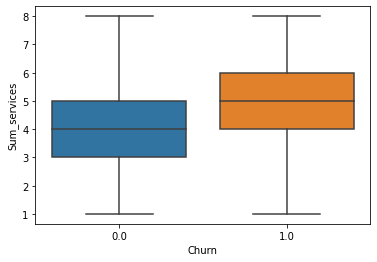

In [42]:
#Perform BoxPlot to find Outliers of Sum_services.
sns.boxplot(x='Churn', y='Sum_services', data=df_cln)

array([[<AxesSubplot:title={'center':'Sum_services'}>,
        <AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Employment'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'Timely_Fixes'}>],
       [<AxesSubplot:title={'center':'Timely_Replacement'}>,
        <AxesSubplot:title={'center':'Reliability'}>,
        <AxesSubplot:title={'center':'Options'}>],
       [<AxesSubplot:title={'center':'Respectable_Response'}>,
        <AxesSubplot:title={'center':'Courteous_Exchange'}>,
        <AxesSubplot:title={'center':'Evidence_of_active_listening'}>]],
      dtype=object)

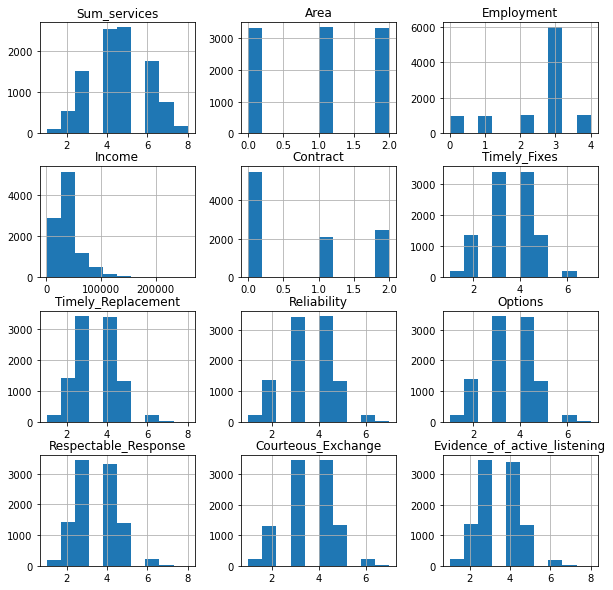

In [43]:
#Perform Univariate Analysis histogram on all predictor variables.
df_cln[['Sum_services','Area','Employment','Income','Contract',
        'Timely_Fixes','Timely_Replacement','Reliability','Options',
        'Respectable_Response','Courteous_Exchange','Evidence_of_active_listening']].hist(figsize=(10,10),bins=10)

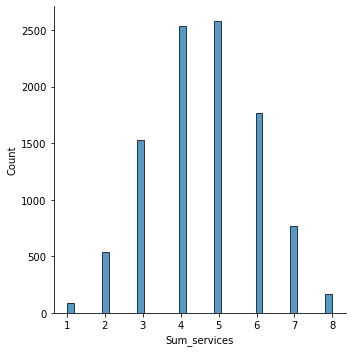

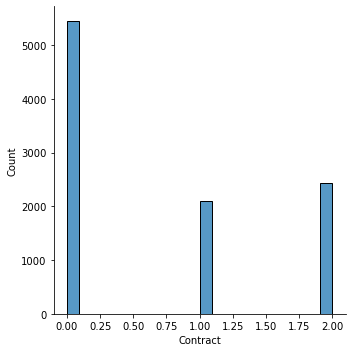

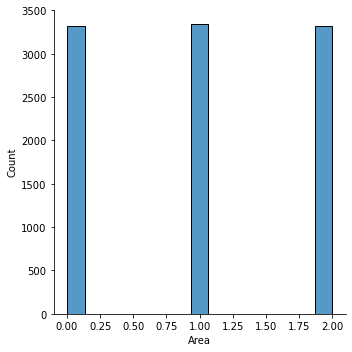

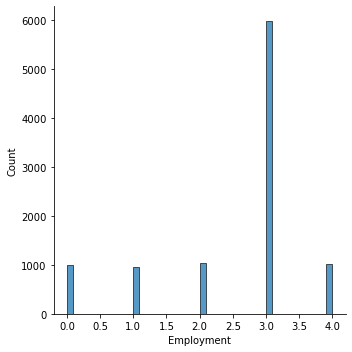

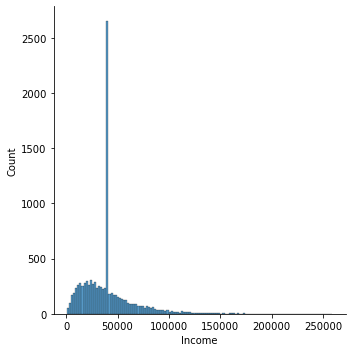

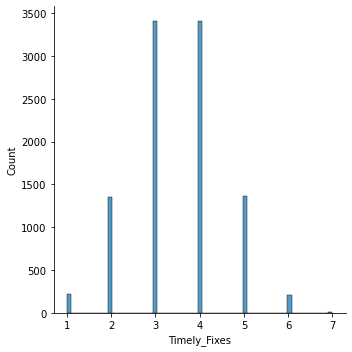

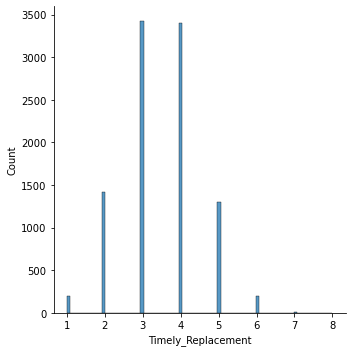

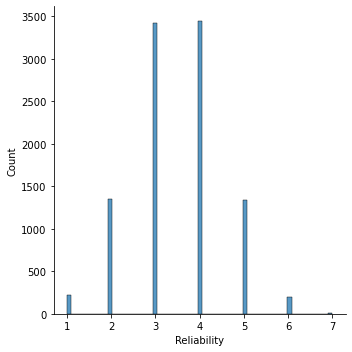

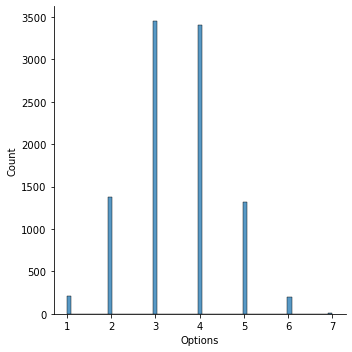

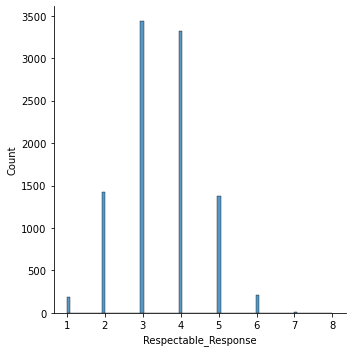

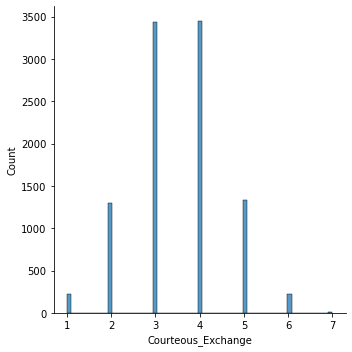

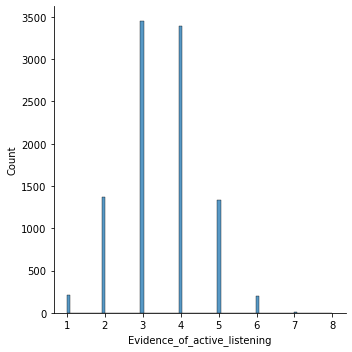

In [44]:
#Create a displot for all predictor variable.
sns.displot(df_cln['Sum_services'])
sns.displot(df_cln['Contract'])
sns.displot(df_cln['Area'])
sns.displot(df_cln['Employment'])
sns.displot(df_cln['Income'])
sns.displot(df_cln['Timely_Fixes'])
sns.displot(df_cln['Timely_Replacement'])
sns.displot(df_cln['Reliability'])
sns.displot(df_cln['Options'])
sns.displot(df_cln['Respectable_Response'])
sns.displot(df_cln['Courteous_Exchange'])
sns.displot(df_cln['Evidence_of_active_listening'])

<AxesSubplot:xlabel='Sum_services'>

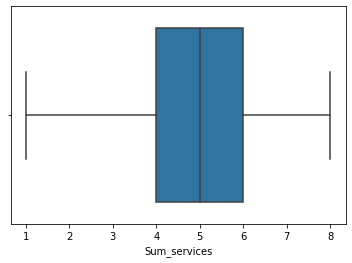

In [45]:
#Create Boxplot for 'Sum_services'.
sns.boxplot(x='Sum_services', data=df_cln)

<AxesSubplot:xlabel='Income'>

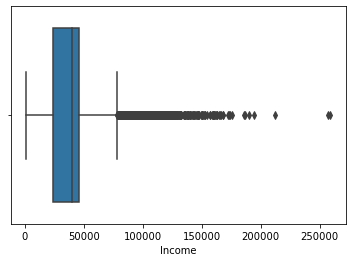

In [46]:
#Create Boxplot for 'Income'.
sns.boxplot(x='Income', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Sum_services'>

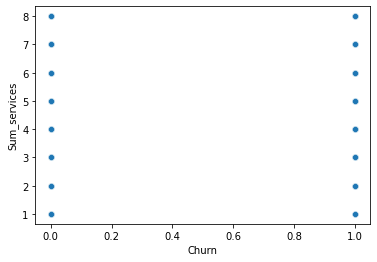

In [47]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Sum_services', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Contract'>

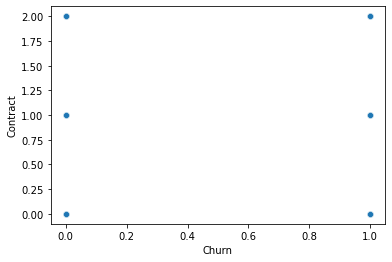

In [48]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Contract', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Area'>

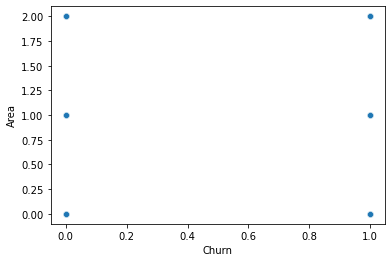

In [49]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Area', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Employment'>

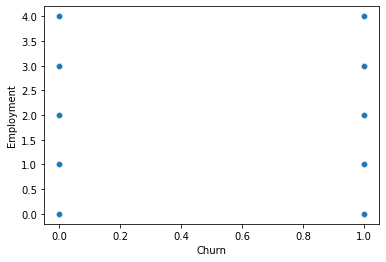

In [50]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Employment', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Income'>

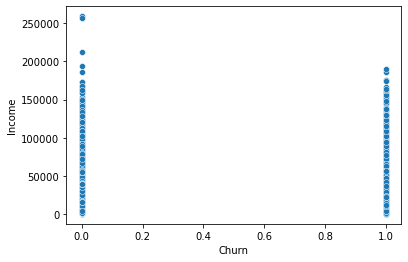

In [51]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Income', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Timely_Fixes'>

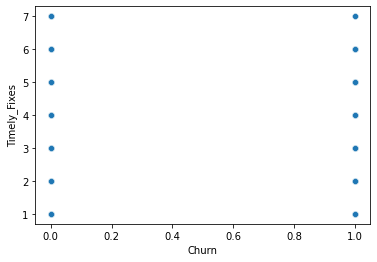

In [52]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Timely_Fixes', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Timely_Replacement'>

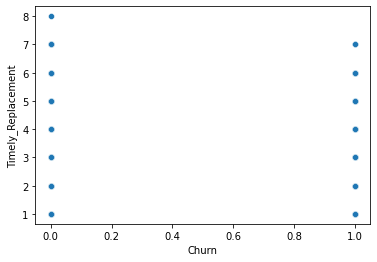

In [53]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Timely_Replacement', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Reliability'>

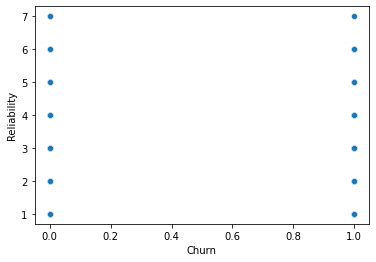

In [54]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Reliability', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Options'>

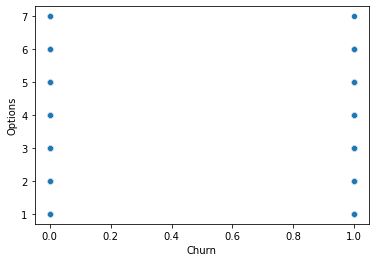

In [55]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Options', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Respectable_Response'>

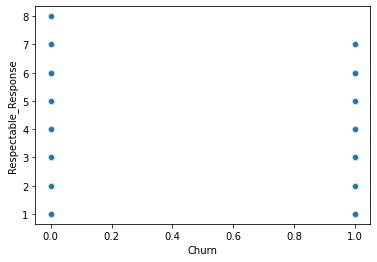

In [56]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Respectable_Response', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Courteous_Exchange'>

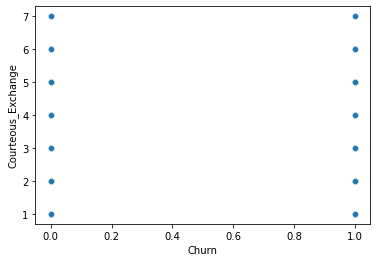

In [57]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Courteous_Exchange', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Evidence_of_active_listening'>

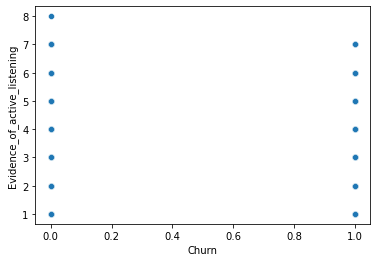

In [58]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.scatterplot(x='Churn',y='Evidence_of_active_listening', data=df_cln)

<AxesSubplot:xlabel='Churn', ylabel='Sum_services'>

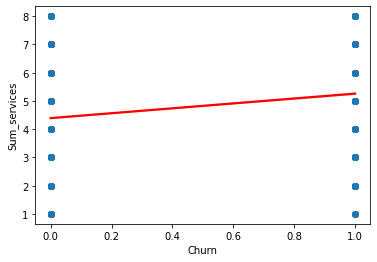

In [59]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Sum_services', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Contract'>

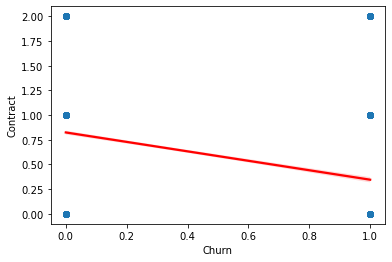

In [60]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Contract', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Area'>

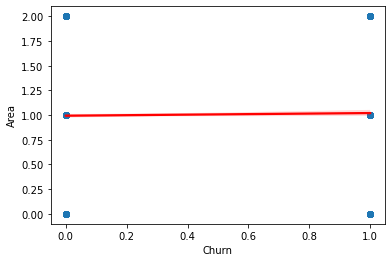

In [61]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Area', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Employment'>

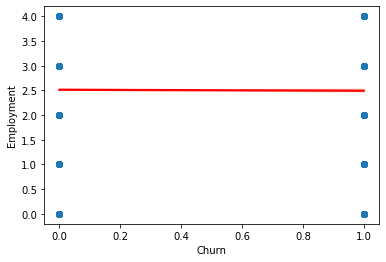

In [62]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Employment', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Income'>

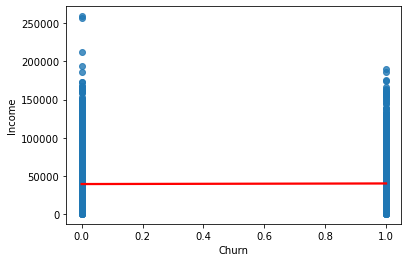

In [63]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Income', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Timely_Fixes'>

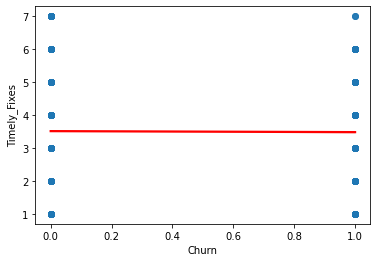

In [64]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Timely_Fixes', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Timely_Replacement'>

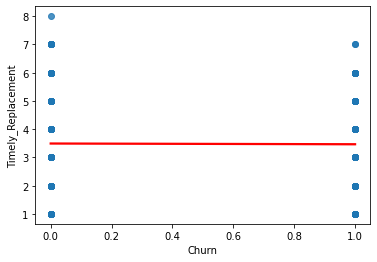

In [65]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Timely_Replacement', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Reliability'>

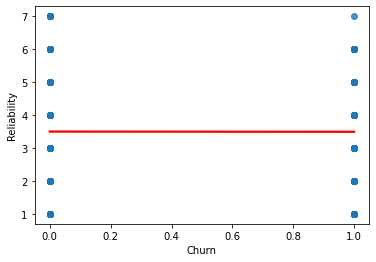

In [66]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Reliability', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Options'>

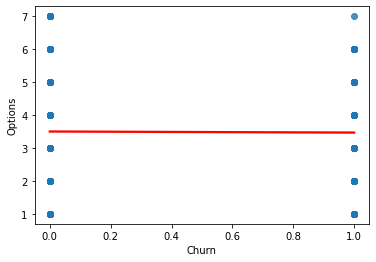

In [67]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Options', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Respectable_Response'>

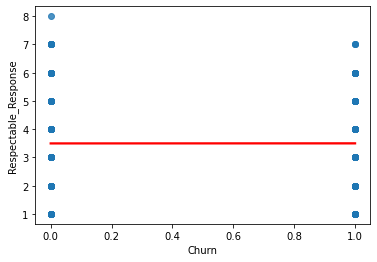

In [68]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Respectable_Response', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Courteous_Exchange'>

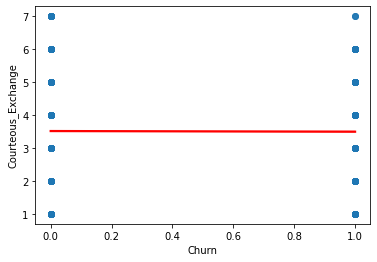

In [69]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Courteous_Exchange', data=df_cln, line_kws={"color": "red"})

<AxesSubplot:xlabel='Churn', ylabel='Evidence_of_active_listening'>

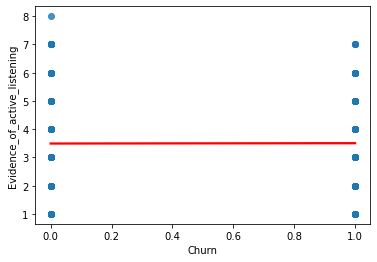

In [70]:
#Create Bivariate Analysis of Churn and predictor variables.
sns.regplot(x='Churn',y='Evidence_of_active_listening', data=df_cln, line_kws={"color": "red"})

In [71]:
#Export cleaned dataset to a new CSV file
df_cln.to_csv('D208_Cleaned_Dataset_T2.csv')


In [72]:
#Create Dummy Variables for Categorical Variables
d_var=pd.get_dummies(df[['Area','Employment','Contract']], prefix="Dummy", drop_first=True)
d_var

,Dummy_Suburban,Dummy_Urban,Dummy_Part Time,Dummy_Retired,Dummy_Student,Dummy_Unemployed,Dummy_One year,Dummy_Two Year
0,0,1,1,0,0,0,1,0
1,0,1,0,1,0,0,0,0
2,0,1,0,0,1,0,0,1
3,1,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
9995,0,0,0,1,0,0,0,0
9996,0,0,1,0,0,0,0,1
9997,0,0,0,0,0,0,0,0
9998,0,1,0,0,0,0,0,1


In [73]:
#Add the dummy variable to a new df. Drop the rows that has null values and create copy of the data frame.
logit_df=pd.concat([df_cln,d_var], axis=1)
logit_df=logit_df.dropna()
logit_clndf=logit_df
logit_df=logit_df.drop(['Area','Employment','Contract','Churn'], axis=1)
logit_df

,Income,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening,Sum_services,Dummy_Suburban,Dummy_Urban,Dummy_Part Time,Dummy_Retired,Dummy_Student,Dummy_Unemployed,Dummy_One year,Dummy_Two Year
0,28561.990000,5.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0,5.0,0,1,1,0,0,0,1,0
1,21704.770000,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,6.0,0,1,0,1,0,0,0,0
2,39936.762226,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,4.0,0,1,0,0,1,0,0,1
3,18925.230000,4.0,4.0,4.0,2.0,5.0,4.0,3.0,3.0,4.0,1,0,0,1,0,0,0,1
4,40074.190000,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,3.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,55723.740000,3.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0,4.0,0,0,0,1,0,0,0,0
9996,39936.762226,4.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,6.0,0,0,1,0,0,0,0,1
9997,39936.762226,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,0,0,0,0,0,0,0,0
9998,16667.580000,4.0,4.0,6.0,4.0,3.0,3.0,5.0,4.0,5.0,0,1,0,0,0,0,0,1


In [74]:
#Review the dataframe
logit_df.shape

(9978, 18)

In [75]:
#Summary statistic for dataset use in regression analysis
logit_df.describe()

,Income,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening,Sum_services,Dummy_Suburban,Dummy_Urban,Dummy_Part Time,Dummy_Retired,Dummy_Student,Dummy_Unemployed,Dummy_One year,Dummy_Two Year
count,9978.000000,9978.00000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000,9978.000000
mean,39954.802691,3.49078,3.504710,3.486170,3.497895,3.492884,3.497194,3.510122,3.495791,4.621668,0.334837,0.332932,0.104029,0.101122,0.096412,0.099018,0.209862,0.244037
std,24581.323593,1.03771,1.034742,1.027857,1.025995,1.024996,1.033683,1.028582,1.029013,1.410267,0.471957,0.471286,0.305313,0.301506,0.295170,0.298701,0.407230,0.429536
min,740.660000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23670.642500,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39936.762226,3.00000,4.000000,3.000000,3.500000,3.000000,3.000000,4.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45512.015000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,258900.700000,7.00000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
#Create new dataframe of Predictor and Target Variable for Logistic Regression Modeling
X=logit_df
y=df_cln[['Churn']]
X

,Income,Timely_Response,Timely_Fixes,Timely_Replacement,Reliability,Options,Respectable_Response,Courteous_Exchange,Evidence_of_active_listening,Sum_services,Dummy_Suburban,Dummy_Urban,Dummy_Part Time,Dummy_Retired,Dummy_Student,Dummy_Unemployed,Dummy_One year,Dummy_Two Year
0,28561.990000,5.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0,5.0,0,1,1,0,0,0,1,0
1,21704.770000,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,6.0,0,1,0,1,0,0,0,0
2,39936.762226,4.0,4.0,2.0,4.0,4.0,3.0,3.0,3.0,4.0,0,1,0,0,1,0,0,1
3,18925.230000,4.0,4.0,4.0,2.0,5.0,4.0,3.0,3.0,4.0,1,0,0,1,0,0,0,1
4,40074.190000,4.0,4.0,4.0,3.0,4.0,4.0,4.0,5.0,3.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,55723.740000,3.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0,4.0,0,0,0,1,0,0,0,0
9996,39936.762226,4.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,6.0,0,0,1,0,0,0,0,1
9997,39936.762226,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,0,0,0,0,0,0,0,0
9998,16667.580000,4.0,4.0,6.0,4.0,3.0,3.0,5.0,4.0,5.0,0,1,0,0,0,0,0,1


In [77]:
#Determine the correlation between the variable for variable selection.
pearson_correlation = logit_df.corr(method='pearson')
print(pearson_correlation)

                                Income  Timely_Response  Timely_Fixes  \
Income                        1.000000         0.000743      0.006768   
Timely_Response               0.000743         1.000000      0.662792   
Timely_Fixes                  0.006768         0.662792      1.000000   
Timely_Replacement           -0.004141         0.577752      0.519889   
Reliability                  -0.019757        -0.004819     -0.002020   
Options                       0.008812        -0.002135      0.001591   
Respectable_Response         -0.003021         0.403126      0.363603   
Courteous_Exchange            0.011144         0.337204      0.301264   
Evidence_of_active_listening -0.004459         0.293151      0.255122   
Sum_services                 -0.004909         0.015321      0.010185   
Dummy_Suburban                0.002501        -0.003621      0.002209   
Dummy_Urban                   0.004284        -0.000486     -0.003011   
Dummy_Part Time               0.010384        -0.00

<AxesSubplot:>

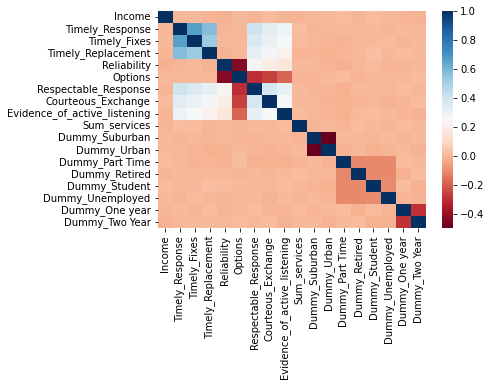

In [78]:
#Plot multicolinearity Heatmap
sns.heatmap(pearson_correlation, xticklabels = pearson_correlation.columns, yticklabels=pearson_correlation.columns, cmap='RdBu')


In [79]:
#Use VIF to determine if value is above threshold of 5
X_int=sm.tools.add_constant(X)

series_X=pd.Series([variance_inflation_factor(X_int.values, i) for i in range(X_int.shape[1])],index=X_int.columns)
print (series_X)

const                           91.539473
Income                           1.001418
Timely_Response                  2.207215
Timely_Fixes                     1.927590
Timely_Replacement               1.603920
Reliability                      1.275674
Options                          1.373098
Respectable_Response             1.481761
Courteous_Exchange               1.313046
Evidence_of_active_listening     1.188671
Sum_services                     1.001277
Dummy_Suburban                   1.336827
Dummy_Urban                      1.337897
Dummy_Part Time                  1.053000
Dummy_Retired                    1.051319
Dummy_Student                    1.051832
Dummy_Unemployed                 1.050927
Dummy_One year                   1.095448
Dummy_Two Year                   1.095303
dtype: float64


In [80]:
#Create an initial Logit Regression model.
logit_churn=sm.Logit(y, X_int).fit()
print(logit_churn.summary())

Optimization terminated successfully.
         Current function value: 0.495693
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 9978
Model:                          Logit   Df Residuals:                     9959
Method:                           MLE   Df Model:                           18
Date:                Sat, 11 Dec 2021   Pseudo R-squ.:                  0.1416
Time:                        16:07:44   Log-Likelihood:                -4946.0
converged:                       True   LL-Null:                       -5762.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.7286      0.241    -11.336      0.000

In [81]:
#Partition the data for testing
X_train, X_test, y_train, y_test = train_test_split(X_int, y, test_size = 0.3, stratify = y)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
print (round(sum(train['Churn'])/len(train)), 2)
print (round(sum(test['Churn'])/len(test), 2))

0 2
0.26


In [82]:
#Fit the Regression Model
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, np.ravel(y_train))

LogisticRegression()

In [83]:
# Make a prediction for each observation in new_data and assign it to predictions
predictions = logreg.predict_proba(X_test)
predictions_target=predictions[:,1]
print(predictions_target)

[0.35709865 0.41044994 0.22668304 ... 0.18090259 0.23291386 0.26282705]


In [84]:
# Calculate the AUC value of the predictor variables
auc = roc_auc_score(y_test, predictions_target)
print(round(auc,2))

0.68


In [85]:
#Logistic Regression Table on trained model
logit_train=sm.Logit(y_train, X_train).fit()
print(logit_train.summary())

Optimization terminated successfully.
         Current function value: 0.498102
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 6984
Model:                          Logit   Df Residuals:                     6965
Method:                           MLE   Df Model:                           18
Date:                Sat, 11 Dec 2021   Pseudo R-squ.:                  0.1375
Time:                        16:08:09   Log-Likelihood:                -3478.7
converged:                       True   LL-Null:                       -4033.4
Covariance Type:            nonrobust   LLR p-value:                2.831e-224
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -2.6483      0.288     -9.207      0.000

In [86]:
#Now we need to verify the variables using using the Forward Stepwise Variable Selection 
#which selects the best AUC value from the list. This creates the auc function
def auc(variables, target, basetable):
    auc_X=logit_clndf[variables]
    auc_y=logit_clndf[target]
    auc_logreg=linear_model.LogisticRegression()
    auc_logreg.fit(auc_X,np.ravel(auc_y))
    auc_predictions=auc_logreg.predict_proba(auc_X)[:,1]
    auc_score=roc_auc_score(auc_y,auc_predictions)
    return(auc_score)

In [87]:
#Create the next_best function to compare and select the best auc_score out of the group
def next_best(current_variables,candidate_variable,target, logit_clndf):
    best_auc=-1
    best_variable=None
    for v in candidate_variable:
        auc_v=auc(current_variables+[v], target, logit_clndf)
        if auc_v>=best_auc:
            best_auc=auc_v
            best_variable=v
    return best_variable

In [88]:
#Go through the list of variables and select the 5 variables with highest AUC score.
candidate_variable = ['Sum_services','Income','Timely_Response',
                      'Timely_Fixes','Timely_Replacement','Reliability','Options',
                      'Respectable_Response','Courteous_Exchange','Evidence_of_active_listening',
                      'Dummy_Suburban','Dummy_Urban', 'Dummy_Part Time','Dummy_Retired',
                      'Dummy_Student','Dummy_Unemployed', 'Dummy_One year','Dummy_Two Year']
current_variables=[]
target=['Churn']
max_number_variables=5
number_iterations=min(max_number_variables, len(candidate_variable))
for i in range(0, number_iterations):
    next_variable=next_best(current_variables,candidate_variable,target,logit_clndf)
    current_variables=current_variables+[next_variable]
    candidate_variable.remove(next_variable)
print(current_variables)

['Sum_services', 'Dummy_Two Year', 'Dummy_One year', 'Timely_Fixes', 'Dummy_Retired']


In [89]:
#Define an auc_train_test function for Forward Stepwise Variable Selection
def auc_train_test(variables, target, train, test):
    X_train = train[variables]
    X_test = test[variables]
    y_train = train[target]
    y_test = test[target]
    logreg_tt = linear_model.LogisticRegression()
    
    # Fit the model on train data
    logreg_tt.fit(X_train, np.ravel(y_train))
    
    # Calculate the predictions both on train and test data
    predictions_train = logreg_tt.predict_proba(X_train)[:,1]
    predictions_test = logreg_tt.predict_proba(X_test)[:,1]
    
    # Calculate the AUC both on train and test data
    auc_train = roc_auc_score(y_train, predictions_train)
    auc_test = roc_auc_score(y_test,predictions_test)
    return(auc_train, auc_test)

In [90]:
#Perform an auc_train_test
auc_train, auc_test = auc_train_test(['Sum_services', 'Dummy_Two Year', 'Dummy_One year', 'Timely_Fixes', 'Dummy_Retired'], ["Churn"], train, test)
print(round(auc_train,2))
print(round(auc_test,2))

0.75
0.76


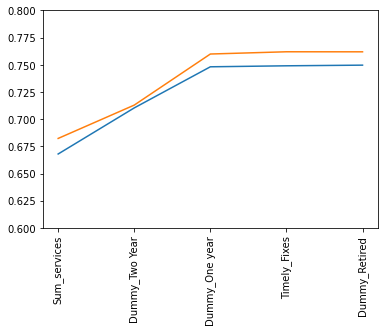

In [91]:
#Plot an AUC
#Keep track of train and test AUC values
auc_values_train = []
auc_values_test = []
variables_evaluate = []
variables_log =logit_clndf[['Sum_services', 'Dummy_Two Year', 'Dummy_One year', 'Timely_Fixes', 'Dummy_Retired']]

# Iterate over the variables in variables
for v in variables_log:
  
    # Add the variable
    variables_evaluate.append(v)
    
    # Calculate the train and test AUC of this set of variables
    auc_train, auc_test = auc_train_test(variables_evaluate, ["Churn"], train, test)
    
    # Append the values to the lists
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)
    

x = np.array(range(0,len(auc_values_train)))
y_train = np.array(auc_values_train)
y_test = np.array(auc_values_test)
plt.xticks(x, variables_log, rotation = 90)
plt.plot(x,y_train)
plt.plot(x,y_test)
plt.ylim((0.6, 0.8))
plt.show()

In [92]:
#Partition the data for testing with reduced predictor based on P-Value and Auc Score
logit_var=logit_df[['Sum_services','Dummy_One year','Dummy_Two Year']]
logit_var=sm.add_constant(logit_var)
X_train1, X_test1, y_train, y_test = train_test_split(logit_var, y, test_size = 0.3, stratify = y)
train1 = pd.concat([X_train1, y_train], axis=1)
test1 = pd.concat([X_test1, y_test], axis=1)
print (round(sum(train1['Churn'])/len(train1)), 2)
print (round(sum(test1['Churn'])/len(test1), 2))

0 2
0.26


In [93]:
#Fit the Regression Model
log_reg1 = linear_model.LogisticRegression()
log_reg1.fit(X_train1, np.ravel(y_train))

LogisticRegression()

In [94]:
#Use model to predict
predictions2 = log_reg1.predict_proba(X_test1)
predictions_target2=predictions2[:,1]
print(predictions_target2[0:5])

[0.06007289 0.12622314 0.07219352 0.29220799 0.29220799]


In [95]:
# Calculate the AUC value of the reduced predictor variables
auc2 = roc_auc_score(y_test, predictions_target2)
print(round(auc2,2))

0.75


In [97]:
#Determine the correlation between the variable for variable selection.
pearson_correlation1 = logit_df[['Sum_services','Dummy_One year','Dummy_Two Year']].corr(method='pearson')
print(pearson_correlation1)

                Sum_services  Dummy_One year  Dummy_Two Year
Sum_services        1.000000        0.014700        0.004342
Dummy_One year      0.014700        1.000000       -0.292814
Dummy_Two Year      0.004342       -0.292814        1.000000


<AxesSubplot:>

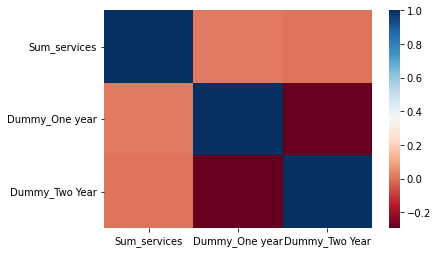

In [98]:
#Plot multicolinearity Heatmap
sns.heatmap(pearson_correlation1, xticklabels = pearson_correlation1.columns, yticklabels=pearson_correlation1.columns, cmap='RdBu')


In [99]:
#Use VIF to determine if value is above threshold of 5
series_X1=pd.Series([variance_inflation_factor(logit_var.values, i) for i in range(logit_var.shape[1])],index=logit_var.columns)
print (series_X1)

const             12.481147
Sum_services       1.000298
Dummy_One year     1.094086
Dummy_Two Year     1.093871
dtype: float64


In [100]:
#Logistic Regression Table on train model with reduced variable
logit_final=sm.Logit(y_train, X_train1).fit()
print(logit_final.summary())

Optimization terminated successfully.
         Current function value: 0.496315
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 6984
Model:                          Logit   Df Residuals:                     6980
Method:                           MLE   Df Model:                            3
Date:                Sat, 11 Dec 2021   Pseudo R-squ.:                  0.1406
Time:                        16:10:46   Log-Likelihood:                -3466.3
converged:                       True   LL-Null:                       -4033.4
Covariance Type:            nonrobust   LLR p-value:                1.283e-245
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.9866      0.117    -25.636      0.000      -3.215      -2.758
Sum_services     

# Interpretation of our coefficient
The coefficient for “Sum_services” is 0.50 which indicates that as the number of services goes up by 1 unit, the odds of a customer churn increases by 64%. The coefficient of “Dummy_One year” is -1.39 which indicates that a customer who signs a contract for one year has a 75% decrease odds of churning when compared to a month-to-month customer. The coefficient of Dummy_Two year is -1.65 which indicates that a customer who signs a contract for two years has an 80% decrease odds of churning when compared to a month-to-month customer.

In [101]:
#Create a confusion matrix
logmodel=linear_model.LogisticRegression()
logmodel.fit(X_train1,np.ravel(y_train))
y_pred=logmodel.predict(X_test1)
c_m=cm(y_test, y_pred)
print(c_m)

[[1998  205]
 [ 535  256]]


In [102]:
print (y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [103]:
#Check Accuracy/Sensitivity/Specifity of the Confusion Matrix
TN = c_m[0,0]
TP = c_m[1,1]
FN = c_m[1,0]
FP = c_m[0,1]

# Calculate and print the accuracy
accuracy = (TN+TP)/(TN+TP+FN+FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity. Correctly identify as TP
sensitivity = (TP/(FN+TP))
print("sensitivity: ", sensitivity)

# Calculate and print the specificity.  Correctly identify as TN
specificity = (TN/(TN+FP))
print("specificity: ", specificity)

accuracy:  0.7528390113560455
sensitivity:  0.32364096080910243
specificity:  0.9069450748978666


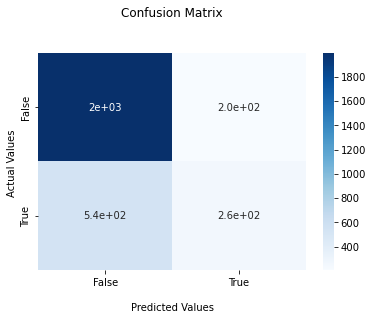

In [104]:
#Plot a Heatmap of the confusion matrix
cm_heat = sns.heatmap(c_m, annot=True, cmap='Blues')
cm_heat.set_title('Confusion Matrix\n\n');
cm_heat.set_xlabel('\nPredicted Values')
cm_heat.set_ylabel('Actual Values ');
cm_heat.xaxis.set_ticklabels(['False','True'])
cm_heat.yaxis.set_ticklabels(['False','True'])
plt.show()

In [105]:
#Print Classification Report
y_pred_test=logmodel.predict(X_test1)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.91      0.84      2203
         1.0       0.56      0.32      0.41       791

    accuracy                           0.75      2994
   macro avg       0.67      0.62      0.63      2994
weighted avg       0.73      0.75      0.73      2994

